In [1]:
import os
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

2024-01-29 23:40:09.553731: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-29 23:40:11.475421: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-29 23:40:11.475486: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-29 23:40:11.638852: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-29 23:40:12.049778: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-29 23:40:23.408886: W tensorflow/compiler/tf2tensorrt/utils/py_utils.

In [2]:
def unpickle(file):
    try:
        with open(file, 'rb') as f:
            data = pickle.load(f, encoding="latin1")
        return data
    except Exception as e:
        print(f"Erro ao carregar o arquivo {file}: {e}")
        raise

def load_training_data(dataset_path):
    num_files = 5
    num_images_per_file = 10000

    train_images = np.zeros([num_files * num_images_per_file, 3072])
    train_labels = np.zeros([num_files * num_images_per_file])

    for i in range(1, num_files + 1):
        path = os.path.join(dataset_path, f"data_batch_{i}")
        data_dict = unpickle(path)
        start = (i - 1) * num_images_per_file
        end = i * num_images_per_file
        train_images[start:end, :] = data_dict["data"]
        train_labels[start:end] = data_dict["labels"]

    return np.asarray(train_images, dtype=int), np.asarray(train_labels, dtype=int)

def load_test_data(dataset_path):
    path = os.path.join(dataset_path, "test_batch")
    datadict = unpickle(path)
    test_images = datadict["data"]
    test_labels = datadict["labels"]
    return np.asarray(test_images, dtype=int), np.asarray(test_labels, dtype=int)

def visualize(images, labels, n_rows=2, n_cols=5):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))
    for i in range(n_rows):
        for j in range(n_cols):
            index = i * n_cols + j
            axes[i, j].imshow(images[index].reshape(32, 32, 3) / 255.0)
            axes[i, j].axis('off')
            axes[i, j].set_title(f"Label: {labels[index]}")
    plt.show()

In [3]:
# Carregamento de dados
dataset_path = "../cifar-10-batches-py"
train_images, train_labels = load_training_data(dataset_path)
test_images, test_labels = load_test_data(dataset_path)

In [4]:
# Normalização de imagens
train_images = train_images / 255.0
test_images = test_images / 255.0

In [5]:
# Divisão dos dados de treinamento
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.1, random_state=42
)

In [6]:
# Remodelar os dados para o formato de imagem
train_images = train_images.reshape((-1, 32, 32, 3))
val_images = val_images.reshape((-1, 32, 32, 3))
test_images = test_images.reshape((-1, 32, 32, 3))

In [7]:
# Construção do modelo de rede neural de duas camadas com TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
# Compilação do modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Treinamento do modelo
model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

2024-01-29 23:41:41.845021: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 552960000 exceeds 10% of free system memory.


Epoch 1/10
1407/1407 [==============================] - 40s 22ms/step - loss: 1.8923 - accuracy: 0.3260 - val_loss: 1.7834 - val_accuracy: 0.3640
Epoch 2/10
1407/1407 [==============================] - 40s 29ms/step - loss: 1.7224 - accuracy: 0.3834 - val_loss: 1.7746 - val_accuracy: 0.3584
Epoch 3/10
1407/1407 [==============================] - 40s 28ms/step - loss: 1.6661 - accuracy: 0.4044 - val_loss: 1.6725 - val_accuracy: 0.4010
Epoch 4/10
1407/1407 [==============================] - 54s 38ms/step - loss: 1.6281 - accuracy: 0.4178 - val_loss: 1.6354 - val_accuracy: 0.4174
Epoch 5/10
1407/1407 [==============================] - 32s 22ms/step - loss: 1.6034 - accuracy: 0.4291 - val_loss: 1.6646 - val_accuracy: 0.3976
Epoch 6/10
1407/1407 [==============================] - 30s 21ms/step - loss: 1.5842 - accuracy: 0.4368 - val_loss: 1.6142 - val_accuracy: 0.4234
Epoch 7/10
1407/1407 [==============================] - 29s 20ms/step - loss: 1.5638 - accuracy: 0.4464 - val_loss: 1.6129 -

In [10]:
# Avaliação da precisão no conjunto de testes
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Accuracy on test set:", test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 1.5459 - accuracy: 0.4549
Accuracy on test set: 0.45489999651908875


313/313 [==============================] - 2s 6ms/step


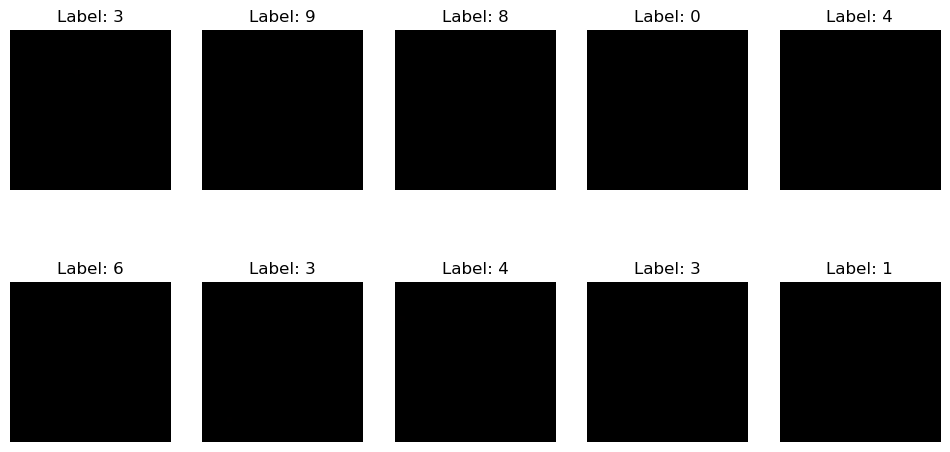

In [11]:
# Visualização de algumas imagens do conjunto de testes com previsões
predicted_labels = np.argmax(model.predict(test_images), axis=1)
visualize(test_images, predicted_labels)
